In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

# Đọc dữ liệu từ file zip

In [9]:
def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [10]:
extract_zip('data/InkData_line_processed.zip', 'data/4')

In [11]:
len(os.listdir('data/4/InkData_line_processed/'))

14564

# Di chuyển file

In [3]:
root = 'data/4'
dataPath = 'InkData_line_processed'

In [13]:
cnt = 0
char_count = []
len_list = []
size = []
invalid_img = []

for path in os.listdir(root + '/' + dataPath):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/' + dataPath + '/' + path
        labelpath = root + '/' + dataPath + '/' + os.path.splitext(path)[0] + '.txt'

        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            # char_list.update(set(content))
            char_count.append(len(content))
            len_list.append(len(content.split()))
            
        # Đọc img
        # if len(content) in range(51, 96):
        #     img = Image.open(old_imgpath).convert('L')
        #     w, h = img.size
        #     # size.append(img.size)
        #     if w / h > 512/32:
        #         print(old_imgpath)
        #         invalid_img.append(old_imgpath)
        
        # Di chuyển file------------------------------------------
        # if len(content) in range(51, 96):
        #     shutil.move(imgpath, 'data/4/img') # Di chuyển file 
        #     shutil.move(labelpath, 'data/4/label') # Di chuyển file 

In [14]:
assert len(os.listdir('data/4/img/')) == len(os.listdir('data/4/label'))

# check data

## check size

In [19]:
invalid_img = []
for path in os.listdir(root + '/img'):
    imgpath = root + '/img/' + path
    labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

    # Đọc text
    # with open(labelpath, 'r') as f:
    #     content = f.readline().rstrip('\n').strip()
    #     # if '-' in content:
    #     #     print(path)
    #     # char_list.update(set(content))
    #     char_count.append(len(content))
    #     len_list.append(len(content.split()))
        
    # Đọc img
    img = Image.open(imgpath).convert('L')
    w, h = img.size
    # size.append(img.size)
    if w / h > 512/32:
        print(imgpath)
        invalid_img.append(imgpath)
    

# Visual

In [16]:
df_char = pd.DataFrame(char_count, columns=['char_cnt'])

In [23]:
# df_char[(df_char > 50) & (df_char <= 95)].value_counts()
df_char[(df_char > 50) & (df_char <= 95)].count()


char_cnt    6273
dtype: int64

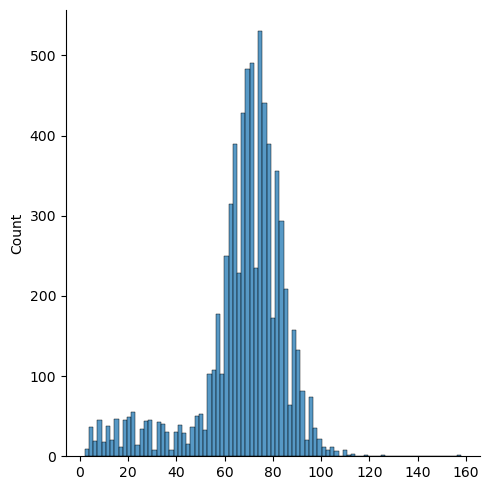

In [12]:
sns.displot(char_count)

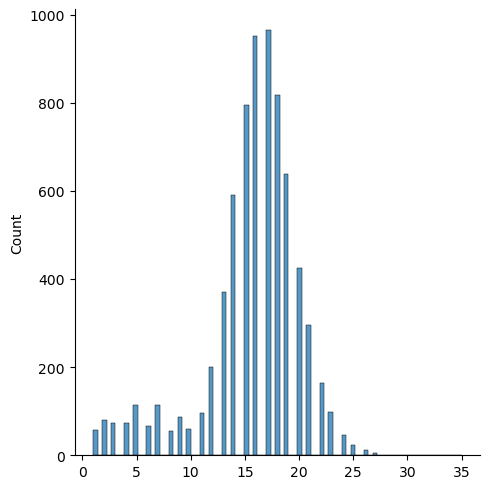

In [13]:
sns.displot(len_list)

# Khảo sát độ dài

# Xử lý img and label

In [2]:
import os

def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            return content
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def delete_file(file_path):
    try:
        os.remove(file_path)
        return
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def count_words(text):
    return len(text.split())

In [11]:
path = '123.abc'
path.endswith(('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg'))

False

In [11]:
s = "hllo"
taphop = set()
taphop.update(set(s))
taphop

{'h', 'l', 'o'}

In [37]:
cnt = 0
list_len = []
char_list = set()
root = 'data/1'
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpth = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        with open(labelpth, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            char_list.update(set(content))
            char_count = len(content)
            list_len.append(char_count)
            
        if char_count in range(51, 96):
            cnt += 1
            # shutil.move(imgpath, 'data/img/') # Di chuyển file 
            # shutil.move(labelpth, 'data/label/') # Di chuyển file 
cnt

6273

In [38]:
l = list(char_list)
char = ''.join(sorted(l))
char


' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [39]:
len(char)

154

In [40]:
len(' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ')

154

In [35]:
char[8] == '-'

True

In [24]:
print(char_list)
char_list.__len__()

{'ồ', 'ở', 'é', ',', 'ơ', 'ứ', 'H', '0', '/', 'W', 'I', 'v', 'j', 'z', '3', 'N', 'ô', '2', 'l', '"', 'F', 'B', 'đ', 'S', 'ổ', 'ụ', 'ỷ', 'ậ', '1', 'R', 'ử', ':', 'ỹ', 'U', 'ế', 'Ồ', 'à', 'ệ', 'G', 'c', 'ấ', 'f', 'ê', 'P', 'ớ', 'Ấ', '8', 'J', 'L', '!', 'Ă', 'h', 'ù', 'ì', 'ờ', 'ặ', '6', 'Â', 'Đ', '.', 'Ở', 'ỳ', 'ẳ', 'ữ', 'X', 'A', 'ề', '9', 'í', 'Ơ', 'ợ', 'Ô', 'd', 'r', 'ú', 'y', '4', 'ả', 'õ', 'C', '?', 'ỡ', 'ằ', 'ĩ', 'E', 'ẩ', 'q', 'ò', 'á', 'ã', 'D', 'ỗ', 'e', 'ỉ', 'ũ', 's', 'Q', 'ộ', 'ị', 'Ý', 'ễ', ';', 'ư', 'ỏ', 'm', 'ẽ', ')', 'ý', 'ủ', 'K', 'ẫ', 'k', 'M', 'ể', 'ẻ', 'Ủ', 'u', '7', 'ố', '&', '5', 'Ú', 'x', 'Ầ', 'ă', '-', 'ẹ', 'ọ', 'Y', '%', 'Á', 't', '(', 'è', 'â', 'b', 'V', 'ự', 'ừ', 'i', 'a', 'ó', 'ầ', 'o', 'ạ', 'g', 'p', 'O', 'Ư', 'ắ', 'T', 'n', ' ', 'ẵ'}


154

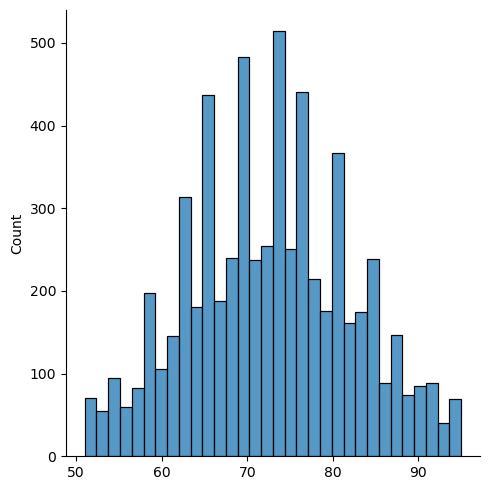

In [5]:
sns.displot(list_len)

In [41]:
len(os.listdir('data/label'))

6273

In [37]:
cnt

6273

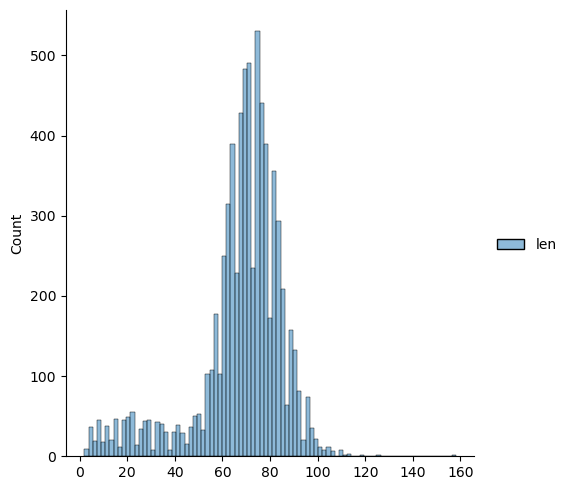

In [29]:
df = pd.DataFrame(list_len, columns=['len'])
sns.displot(df)

In [35]:
for i in range(50, 96):
    print(i, df.len.value_counts()[i])

50 16
51 37
52 33
53 55
54 47
55 48
56 60
57 83
58 95
59 102
60 105
61 145
62 143
63 171
64 181
65 208
66 229
67 188
68 240
69 220
70 263
71 237
72 254
73 235
74 279
75 251
76 223
77 218
78 214
79 176
80 172
81 195
82 161
83 174
84 119
85 119
86 89
87 64
88 83
89 74
90 85
91 48
92 41
93 40
94 20
95 49
